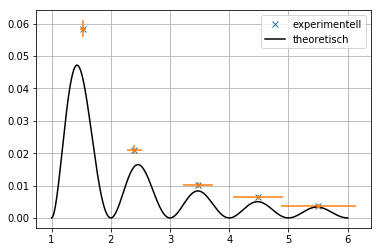

In [62]:
import numpy as np
import math
import matplotlib.pyplot as plt
I0 = 30620
I0f = 900
maxl = [1747,689,385,271,179]
maxlink = [i-75 for i in maxl]
maxr = [1984,755,388,275,204]
maxrecht = [i-75 for i in maxr]
maxintens = np.add(maxlink, maxrecht) # Durchschnitt der Intensität der Nebenmaxima
maxrelintens = [i/(I0*2) for i in maxintens] # relative Intensität der Nebenmaxima
maxrelintensf = [math.sqrt(i / I0**2 + i**2/4*I0f**2/I0**4) for i in maxintens] # Fehler
def f(x):
    return (math.sin(x*math.pi)/x/math.pi)**2 # theoretische Intensitätverhältnisse
x = np.linspace(1,6, 1000)
y = [f(i) for i in x]
expx = [1.533,2.400,3.469,4.486,5.503] # experimentell bestimmte Lage der Maximum
expxf = [0.051,0.123,0.254,0.423,0.635]
plt.plot(expx, maxrelintens, "x", label="experimentell")
plt.errorbar(expx, maxrelintens, yerr=maxrelintensf, xerr=expxf, fmt='.')
plt.plot(x, y, 'k', label = "theoretisch")
plt.grid()
plt.legend()
plt.show()

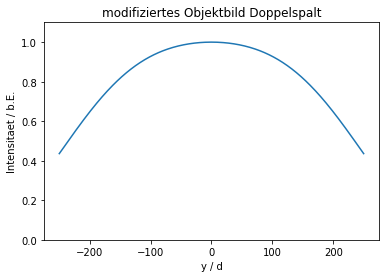

In [107]:
# Berechnung der modifizierten Spaltbilder

# Doppelspalt
def doppelspalt(k):
    return 2 * d/np.pi * np.cos(k*g/2) * np.sin(k*d/2) / (k*d/2) * np.cos(y2*k)

d = 71.335 # Spaltbreite
n = 0.15 # Integrationsbereich
# Spaltabstand in Einheiten der Spaltbreite
g = 4.28 * d
Y2 = np.linspace(-3.5, 3.5, 400)*d

from scipy.integrate import quad
f2_modifiziert=[]
for y2 in Y2:
    result2, error2 = quad(doppelspalt, 0, 2*np.pi*n/d)
    f2_modifiziert.append(result2**2)

# Kurve auf 1 nomieren
f2_modifiziert /= np.max(f2_modifiziert)

#plt.plot(Y, f_modifiziert, label = "Spalt")
plt.plot(Y2, f2_modifiziert, label = "Doppelspalt")
plt.xlabel("y / d")
plt.ylabel("Intensitaet / b.E.")
plt.title("modifiziertes Objektbild Doppelspalt")
plt.ylim((0, 1.1))
#plt.legend()
plt.show()


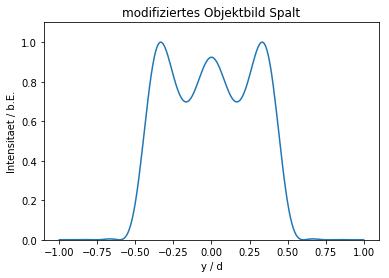

In [103]:
# Integrad
def spalt(k):
    return d/np.pi*np.sin(k*d/2)/(k*d/2)*np.cos(y*k)

d = 1 # Spaltbreite
n = 3 # Integrationsbereich
Y = np.linspace(-1, 1, 200)*d # y-Werte

f_modifiziert=[]
for y in Y:
    result, error = quad(spalt, 0, 2*np.pi*n/d)
    f_modifiziert.append(result**2)
    
f_modifiziert /= np.max(f_modifiziert)    

plt.plot(Y, f_modifiziert, label = "Spalt")
plt.xlabel("y / d")
plt.ylabel("Intensitaet / b.E.")
plt.title("modifiziertes Objektbild Spalt")
plt.ylim((0, 1.1))
plt.show()